<a href="https://colab.research.google.com/github/Nekoiii/ML_Practices_colab/blob/main/imgs_to_prompts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Check GPU
!nvidia-smi -L

GPU 0: NVIDIA A100-SXM4-40GB (UUID: GPU-58a475ba-8b69-e176-2b42-aae9f54a447d)


In [2]:
#@title Image To Prompts
#https://colab.research.google.com/github/pharmapsychotic/clip-interrogator/blob/main/clip_interrogator.ipynb#scrollTo=xpPKQR40qvz2

#@title Setup
import os, subprocess

def setup():
    install_cmds = [
        ['pip', 'install', 'gradio'],
        ['pip', 'install', 'open_clip_torch'],
        ['pip', 'install', 'clip-interrogator'],
    ]
    for cmd in install_cmds:
        print(subprocess.run(cmd, stdout=subprocess.PIPE).stdout.decode('utf-8'))

setup()


caption_model_name = 'blip-large' #@param ["blip-base", "blip-large", "git-large-coco"]
clip_model_name = 'ViT-L-14/openai' #@param ["ViT-L-14/openai", "ViT-H-14/laion2b_s32b_b79k"]

import gradio as gr
from clip_interrogator import Config, Interrogator

config = Config()
config.clip_model_name = clip_model_name
config.caption_model_name = caption_model_name
ci = Interrogator(config)

def image_analysis(image):
    image = image.convert('RGB')
    image_features = ci.image_to_features(image)

    top_mediums = ci.mediums.rank(image_features, 5)
    top_artists = ci.artists.rank(image_features, 5)
    top_movements = ci.movements.rank(image_features, 5)
    top_trendings = ci.trendings.rank(image_features, 5)
    top_flavors = ci.flavors.rank(image_features, 5)

    medium_ranks = {medium: sim for medium, sim in zip(top_mediums, ci.similarities(image_features, top_mediums))}
    artist_ranks = {artist: sim for artist, sim in zip(top_artists, ci.similarities(image_features, top_artists))}
    movement_ranks = {movement: sim for movement, sim in zip(top_movements, ci.similarities(image_features, top_movements))}
    trending_ranks = {trending: sim for trending, sim in zip(top_trendings, ci.similarities(image_features, top_trendings))}
    flavor_ranks = {flavor: sim for flavor, sim in zip(top_flavors, ci.similarities(image_features, top_flavors))}
    
    return medium_ranks, artist_ranks, movement_ranks, trending_ranks, flavor_ranks

def image_to_prompt(image, mode):
    ci.config.chunk_size = 2048 if ci.config.clip_model_name == "ViT-L-14/openai" else 1024
    ci.config.flavor_intermediate_count = 2048 if ci.config.clip_model_name == "ViT-L-14/openai" else 1024
    image = image.convert('RGB')
    if mode == 'best':
        return ci.interrogate(image)
    elif mode == 'classic':
        return ci.interrogate_classic(image)
    elif mode == 'fast':
        return ci.interrogate_fast(image)
    elif mode == 'negative':
        return ci.interrogate_negative(image)
      


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.1/288.1 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.8 MB/s eta 0:0

Loading CLIP model ViT-L-14/openai...


100%|███████████████████████████████████████| 933M/933M [00:14<00:00, 63.9MiB/s]
ViT-L-14_openai_artists.safetensors: 100%|██████████| 16.2M/16.2M [00:00<00:00, 177MB/s]
ViT-L-14_openai_flavors.safetensors: 100%|██████████| 155M/155M [00:00<00:00, 248MB/s]
ViT-L-14_openai_mediums.safetensors: 100%|██████████| 146k/146k [00:00<00:00, 9.56MB/s]
ViT-L-14_openai_movements.safetensors: 100%|██████████| 307k/307k [00:00<00:00, 12.0MB/s]
ViT-L-14_openai_trendings.safetensors: 100%|██████████| 111k/111k [00:00<00:00, 7.22MB/s]
ViT-L-14_openai_negative.safetensors: 100%|██████████| 63.2k/63.2k [00:00<00:00, 6.14MB/s]

Loaded CLIP model and data in 24.97 seconds.


In [3]:
#@title Image to prompt! 🖼️ -> 📝
   
def prompt_tab():
    with gr.Column():
        with gr.Row():
            image = gr.Image(type='pil', label="Image")
            with gr.Column():
                mode = gr.Radio(['best', 'fast', 'classic', 'negative'], label='Mode', value='best')
        prompt = gr.Textbox(label="Prompt")
    button = gr.Button("Generate prompt")
    button.click(image_to_prompt, inputs=[image, mode], outputs=prompt)

def analyze_tab():
    with gr.Column():
        with gr.Row():
            image = gr.Image(type='pil', label="Image")
        with gr.Row():
            medium = gr.Label(label="Medium", num_top_classes=5)
            artist = gr.Label(label="Artist", num_top_classes=5)        
            movement = gr.Label(label="Movement", num_top_classes=5)
            trending = gr.Label(label="Trending", num_top_classes=5)
            flavor = gr.Label(label="Flavor", num_top_classes=5)
    button = gr.Button("Analyze")
    button.click(image_analysis, inputs=image, outputs=[medium, artist, movement, trending, flavor])

with gr.Blocks() as ui:
    with gr.Tab("Prompt"):
        prompt_tab()
    with gr.Tab("Analyze"):
        analyze_tab()

ui.launch(show_api=False, debug=False)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Generating prompts:   0%|          | 0/39 [00:00<?, ?it/s]

a cartoon drawing of a man and woman standing next to each other, logo for research lab, high school girls, worried, hyperrealistic anatomy posse, comic drawing, two women, female investigator, ux, dipstick tail, an open book, meme template


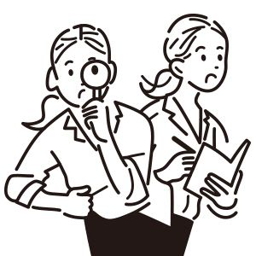

Generating prompts:   3%|▎         | 1/39 [00:17<11:07, 17.57s/it]

a drawing of a woman holding a cell phone and a cup, ko-fi, walking to work, webtoon, nervous, draft, sitcom screenshot, like a catalog photograph, casual business outfit, minimalistic aesthetics, a busy arcade, latte art, uncropped, connections, shoulder pads, lowshot, miffy, it is afternoon


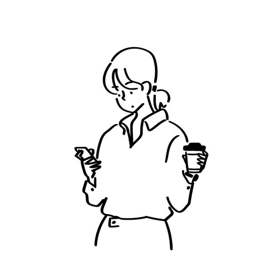

Generating prompts:   5%|▌         | 2/39 [00:32<09:54, 16.08s/it]

a cartoon man holding a bunch of papers and a cell phone, telegram sticker, worried, by Shiba Kōkan, mit technology review, reduce character duplication, black. yellow, npc talking, two people, detailed notes, overblown, with japanese text, worry, uncaring


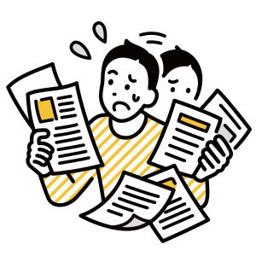

Generating prompts:   8%|▊         | 3/39 [00:47<09:18, 15.51s/it]

a cartoon of a man sitting at a desk with a laptop, ice blue, worry, stacks of books, stressed, flat icon, 2019, pale blue faces, woman very tired, high particle count, samsung smartthings, editorial image, burnout, by Mary Abbott, accurate portrayal, zero - hour, customer, feeling of dread


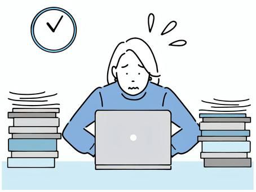

Generating prompts:  10%|█         | 4/39 [01:02<08:56, 15.32s/it]

a woman in a business suit is using a laptop, vector sticker, taupe, smiling with confidence, girl with brown hair, lacking in three-dimensionality, enterprise workflow engine, profile pic, relentlessly detailed, simplified, face shown, draft, connector, nightmarish illustration, email


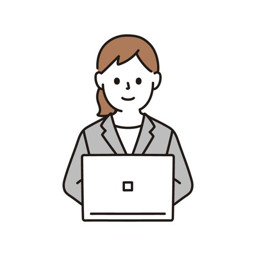

Generating prompts:  13%|█▎        | 5/39 [01:14<08:04, 14.25s/it]

cartoon of a woman presenting a presentation to a group of people, google point of view, 2019 trending photo, white borders, laptops, players handbook, expectation of adventure, flat grey, near future 2 0 3 0, dialog


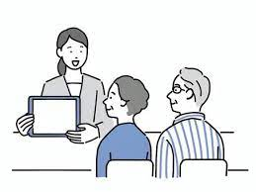

Generating prompts:  15%|█▌        | 6/39 [01:23<06:46, 12.33s/it]

a woman in a white shirt is holding a folder and pointing, harry volk clip art style, he is greeting you warmly, meme template, by Ammi Phillips, she has blond hair, !!!!!!!!!!!!!!!!!!!!!!!!!, yellow awning, by Mary Abbott, feedback loop, long arms, aliased


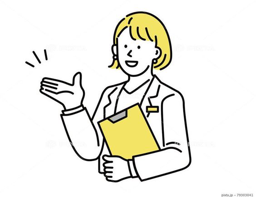

Generating prompts:  18%|█▊        | 7/39 [01:33<06:13, 11.67s/it]

a woman doctor in a white coat is holding a clipboard and pointing to something, telegram sticker design, avatar for website, clearly defined outlines, puṣkaracūḍa, sarcastic smiling, selling insurance, png, dd, favicon, precisely drawn, npc


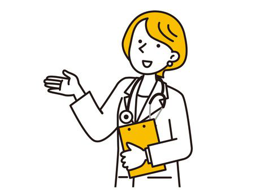

Generating prompts:  21%|██        | 8/39 [01:46<06:11, 11.99s/it]

a woman in a lab coat holding a clipboard and pointing at something, icon for an ai app, face icon stylized minimalist, kawaii cutest sticker ever, professional corporate portrait, hand gesture, girl with brown hair, this kind of smart, pointing index finger, best practices, twitter pfp, sarcastic


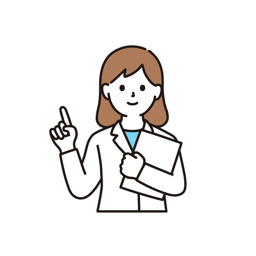

Generating prompts:  23%|██▎       | 9/39 [01:57<05:48, 11.63s/it]

a woman with her arms outstretched and hands up in the air, telegram sticker, けもの, samsung smartthings, pale gray skin, —n 9, confident expression, aya takano, ux, clear refined, arrows, impassioned, beam, mtg


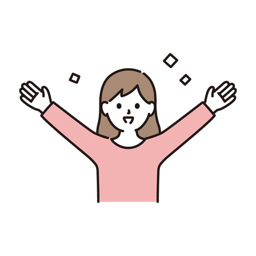

Generating prompts:  26%|██▌       | 10/39 [02:11<05:57, 12.34s/it]

a woman pointing up with a finger up, telegram sticker design, あかさたなは on twitter, sky blue highlights in hair, very simple, forbidden information, infographic style, woman is sitting, made in 2019, without fault, this person does not exist, listing image


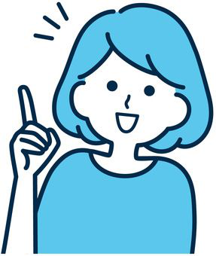

Generating prompts:  28%|██▊       | 11/39 [02:23<05:46, 12.37s/it]

a cartoon of a woman with a hand out and a sign that says,'i'm not a, telegram sticker design, japanese facial features, dramatic thinking pose, yellowish light, ux, white woman, けもの, letterism, say, instagram


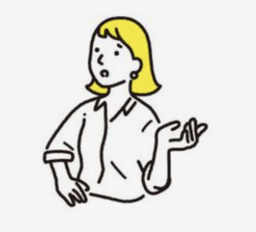

Generating prompts:  31%|███       | 12/39 [02:34<05:21, 11.89s/it]

cartoon of a man sitting at a desk with a laptop, corporate phone app icon, blurry and dreamy illustration, working in a call center, interesting character design, german experssionism, intoxicatingly blurry, eboy, yellowed, in an call centre office, connecting lines, twitter pfp, :6, vivd


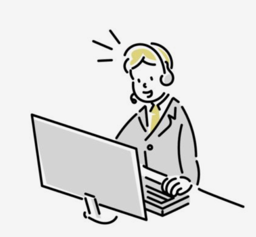

Generating prompts:  33%|███▎      | 13/39 [02:46<05:11, 11.98s/it]

a woman holding a credit card and a stack of coins, perfect face template, trending on artstatoon, apple pie, who is looking up at it in fear, gemini gold cloth, voluptuous sesame seed bun, sephora, labeled diagrams, butter, simple cartoon, expectation


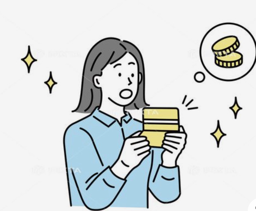

Generating prompts:  36%|███▌      | 14/39 [02:57<04:48, 11.55s/it]

a cartoon of a man in a suit pointing at something, diptych, stockphoto, kid named finger, 2019 trending photo, informative guide, is this loss?, with same hairstyle, patterned clothing, !!!!!!!!!!!!!!!!!!!!!!!!!, human male, panels, authority, modestly clothed


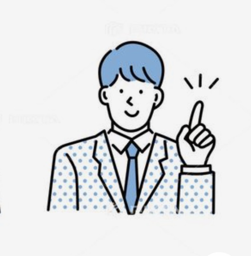

Generating prompts:  38%|███▊      | 15/39 [03:08<04:37, 11.55s/it]

a close up of a person in a suit with a tie, by Hiromu Arakawa, thinker pose, 2019, mono-yellow, icon for weather app, kojima, sitting in a waiting room, youtube thumbnail, inspired by Hiroshi Nagai, blonde guy, mayo, konami concept art, 2 0 1 9, very sad face, u


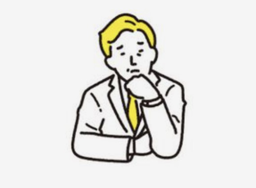

Generating prompts:  41%|████      | 16/39 [03:22<04:42, 12.28s/it]

a woman with her arms crossed and a smile on her face, telegram sticker, hyung-tae kim, golden hair, annoyance, npc, mit technology review, by Maruyama Ōkyo, detail content, mad men, alienating, standing here, {uncertain look}, yellowed, elaine


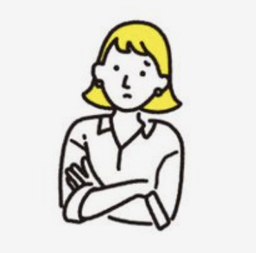

Generating prompts:  44%|████▎     | 17/39 [03:37<04:45, 12.99s/it]

a man in a suit waving his hand with a dot dot pattern, telegram sticker design, youtube thumbnail, isometric style, now, after creating humans, neat hair, dd, editorial awarded, he is greeting you warmly, corrected hand, aliased, best ai image, jk


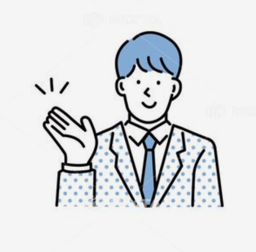

Generating prompts:  46%|████▌     | 18/39 [03:49<04:24, 12.61s/it]

a cartoon man in a suit and tie is looking at something, apocalyptic fallout 7 6, clipart icon, please do your best, binoculars, inspired by Simon Marmion, this person does not exist, heroic pose, x, linkedin, his arms are behind his back, no gold colours, yaoi, very sunny, osr, -640


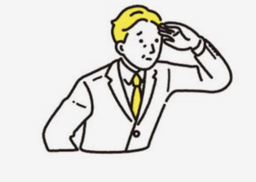

Generating prompts:  49%|████▊     | 19/39 [04:03<04:21, 13.09s/it]

a woman sitting at a desk with a laptop and talking on the phone, avatar for website, dd, cursed imagery, friendly face, perfect dynamic posture, simplistic iconography, selling insurance, beautiful illustration, simplified


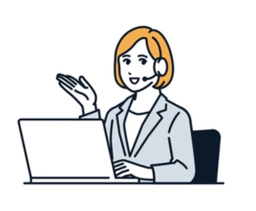

Generating prompts:  51%|█████▏    | 20/39 [04:11<03:42, 11.72s/it]

a woman holding a laptop computer and pointing at it, avatar for website, fear emoji, simple cartoon style, style of angela deane, enterprise workflow engine, made in 2019, solid grey, people walking around, responsive, pale bluish skin, f11:10, chrometype


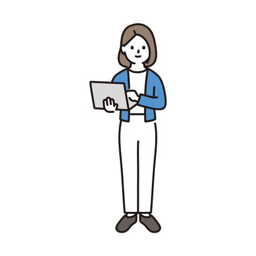

Generating prompts:  54%|█████▍    | 21/39 [04:22<03:26, 11.50s/it]

a man with his arms outstretched and hands up in the air, telegram sticker, by Kōno Michisei, boy with neutral face, sensory processing overload, diagram schematic, open eye freedom, japan studio game, fig.1, vignette illustration, warm friendly face, けもの, from'animation types'


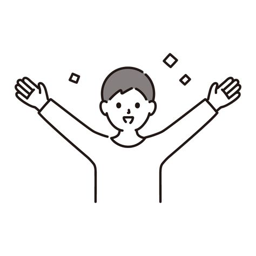

Generating prompts:  56%|█████▋    | 22/39 [04:36<03:28, 12.25s/it]

a cartoon man holding a sandwich and a cup of coffee, damaged japanese clothes, product view, plain white tshirt, friendly guy and small creature, technical manual, wearing a brown, inspired by George Pirie, holding a bagpipe, impactful ambient, garments


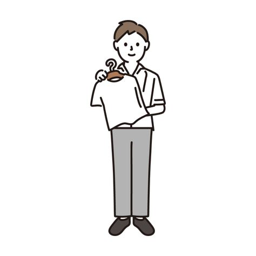

Generating prompts:  59%|█████▉    | 23/39 [04:46<03:02, 11.38s/it]

a woman in a lab coat holding a book and pointing up, digital art emoji collection, perfect face template, inspired by Kōno Michisei, npc talking, saying, ocean dept, aliased, economist, flat icon, fungal pages, influencer, cute cartoon, aoshima, leave, interconnections


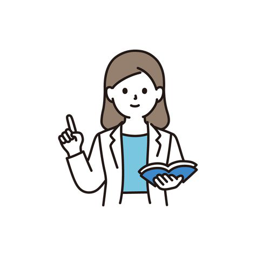

Generating prompts:  62%|██████▏   | 24/39 [05:03<03:16, 13.11s/it]

a man in a suit holding a mug of beer, ios emoji, by Kim Myeong-guk, telegram sticker design, ffffound, connectedness, young adorable korean face, human computer, in the pub, rpg character avatar, information visualization, japan animation, .eps, woo kim, solar, けもの, osr


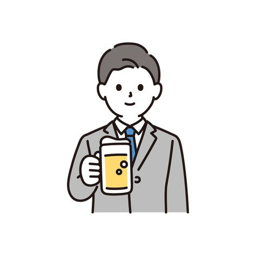

Generating prompts:  64%|██████▍   | 25/39 [05:18<03:11, 13.66s/it]

a person with a laptop computer in their hands, dating app icon, inspired by Kōno Michisei, style of angela deane, minimalist cartoon style, girl wearing hoodie, profile picture 1024px, pipelines, sustainability, crunchyroll, 2019 trending photo, smiley profile, osr, ayami


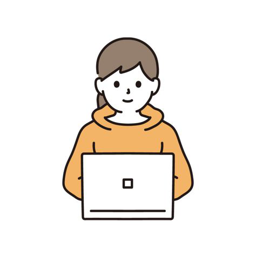

Generating prompts:  67%|██████▋   | 26/39 [05:33<03:02, 14.07s/it]

a man in a suit holding up a sign with chinese characters, telegram sticker design, small room in tokyo, alert, read, awarded, wlop : :, sticker - svg, npc talking, ethnicity : japanese, please do your best, overjoyed, delivering mail, blog-photo, server


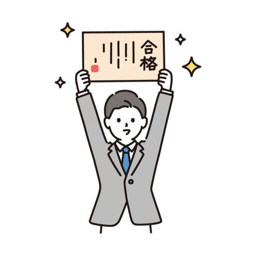

Generating prompts:  69%|██████▉   | 27/39 [05:48<02:35, 12.92s/it]


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 30>:35                                                                            │
│ in image_to_prompt:53                                                                            │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/clip_interrogator/clip_interrogator.py:250 in            │
│ interrogate                                                                                      │
│                                                                                                  │
│   247 │   │   merged = _merge_tables([self.artists, self.flavors, self.mediums, self.movements   │
│   248 │   │   flaves = merged.rank(image_features, self.config.flavor_intermediate_count)        │
│   249 │   │   best_prompt, best_sim = caption, self.similarity(image_features, caption)          │
│ ❱ 250 │   │   best_prompt = self.chain(image_features, flaves, best_prompt, best_sim, min_coun   │
│   251 │   │                                                                                      │
│   252 │   │   fast_prompt = self.interrogate_fast(image, max_flavors, caption=caption)           │
│   253 │   │   classic_prompt = self.interrogate_classic(image, max_flavors, caption=caption)     │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/clip_interrogator/clip_interrogator.py:178 in chain      │
│                                                                                                  │
│   175 │   │   │   return False                                                                   │
│   176 │   │                                                                                      │
│   177 │   │   for idx in tqdm(range(max_count), desc=desc, disable=self.config.quiet):           │
│ ❱ 178 │   │   │   best = self.rank_top(image_features, [f"{curr_prompt}, {f}" for f in phrases   │
│   179 │   │   │   flave = best[len(curr_prompt)+2:]                                              │
│   180 │   │   │   if not check(flave, idx):                                                      │
│   181 │   │   │   │   break                                                                      │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/clip_interrogator/clip_interrogator.py:261 in rank_top   │
│                                                                                                  │
│   258 │   │   self._prepare_clip()                                                               │
│   259 │   │   text_tokens = self.tokenize([text for text in text_array]).to(self.device)         │
│   260 │   │   with torch.no_grad(), torch.cuda.amp.autocast():                                   │
│ ❱ 261 │   │   │   text_features = self.clip_model.encode_text(text_tokens)                       │
│   262 │   │   │   text_features /= text_features.norm(dim=-1, keepdim=True)                      │
│   263 │   │   │   similarity = text_features @ image_features.T                                  │
│   264 │   │   │   if reverse:                                                                    │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/open_clip/model.py:239 in encode_text                    │
│                                                                                                  │
│   236 │   │   x = x.permute(1, 0, 2)  # LND -> NLD                                               │
│   237 │   │   x = self.ln_final(x)  # [batch_size, n_ctx, transformer.width]                     │
│   238 │   │   # take features from the eot embedding (eot_t

In [4]:
#@title Batch process a folder of images 📁 -> 📝

#@markdown This will generate prompts for every image in a folder and either save results 
#@markdown to a desc.csv file in the same folder or rename the files to contain their prompts.
#@markdown The renamed files work well for [DreamBooth extension](https://github.com/d8ahazard/sd_dreambooth_extension)
#@markdown in the [Stable Diffusion Web UI](https://github.com/AUTOMATIC1111/stable-diffusion-webui).
#@markdown You can use the generated csv in the [Stable Diffusion Finetuning](https://colab.research.google.com/drive/1vrh_MUSaAMaC5tsLWDxkFILKJ790Z4Bl?usp=sharing)

import csv
import os
from IPython.display import clear_output, display
from PIL import Image
from tqdm import tqdm

folder_path = "/content/drive/MyDrive/ML_Practices/Lora_test_1/instance_imgs" #@param {type:"string"}
prompt_mode = 'best' #@param ["best","fast","classic","negative"]
output_mode = 'rename' #@param ["desc.csv","rename"]
max_filename_len = 128 #@param {type:"integer"}


def sanitize_for_filename(prompt: str, max_len: int) -> str:
    name = "".join(c for c in prompt if (c.isalnum() or c in ",._-! "))
    name = name.strip()[:(max_len-4)] # extra space for extension
    return name

ci.config.quiet = True

files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')] if os.path.exists(folder_path) else []
prompts = []
for idx, file in enumerate(tqdm(files, desc='Generating prompts')):
    if idx > 0 and idx % 100 == 0:
        clear_output(wait=True)

    image = Image.open(os.path.join(folder_path, file)).convert('RGB')
    prompt = image_to_prompt(image, prompt_mode)
    prompts.append(prompt)

    print(prompt)
    thumb = image.copy()
    thumb.thumbnail([256, 256])
    display(thumb)

    if output_mode == 'rename':
        name = sanitize_for_filename(prompt, max_filename_len)
        ext = os.path.splitext(file)[1]
        filename = name + ext
        idx = 1
        while os.path.exists(os.path.join(folder_path, filename)):
            print(f'File {filename} already exists, trying {idx+1}...')
            filename = f"{name}_{idx}{ext}"
            idx += 1
        os.rename(os.path.join(folder_path, file), os.path.join(folder_path, filename))

if len(prompts):
    if output_mode == 'desc.csv':
        csv_path = os.path.join(folder_path, 'desc.csv')
        with open(csv_path, 'w', encoding='utf-8', newline='') as f:
            w = csv.writer(f, quoting=csv.QUOTE_MINIMAL)
            w.writerow(['image', 'prompt'])
            for file, prompt in zip(files, prompts):
                w.writerow([file, prompt])

        print(f"\n\n\n\nGenerated {len(prompts)} prompts and saved to {csv_path}, enjoy!")
    else:
        print(f"\n\n\n\nGenerated {len(prompts)} prompts and renamed your files, enjoy!")
else:
    print(f"Sorry, I couldn't find any images in {folder_path}")
